In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Unsupervised Learning
##k-means Clustering
##EM algorithm

## k-means Clustering

- Initialize cluster centroids $\mu_1 \dots \mu_k \in ℝ^n$
- Repeat until convergence
    - Set $c^{(i)} := \text{argmin}_j ||x^{(i)}-\mu_j||_2$  (L2 norm)
    - for $j =1,\dots,k$
    
    $$
    \mu_j :=\frac{\sum_{i=1}^m 𝟙[c^{(i)}=j]x^{(i)}}{\sum_{i=1}^m𝟙[c^{(i)}=j]}
    $$

Cost Function (c = assignments, mu = centroids)

$$
J(c,\mu) = \sum_{i=1}^m||x^{(i)}-\mu_j||_2
$$
(L2 norm: $||x||_{2}=\sqrt{x_{1}^{2}+x_{2}^{2}+\dots +x_{n}^{2}}$)



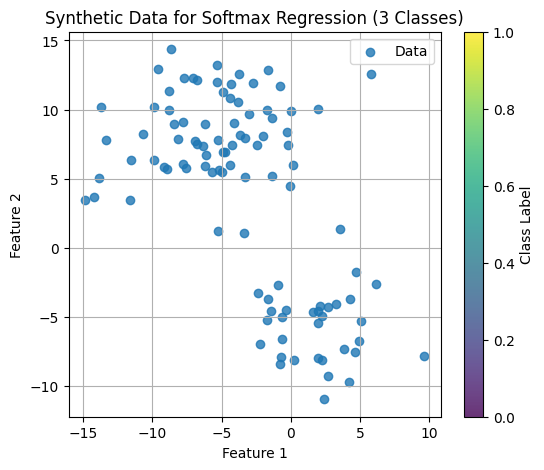

In [ ]:
from sklearn.datasets import make_blobs

np.random.seed(0)
N_samples = 300
n_features = 3
n_classes = 3
X, Y = make_blobs(n_samples=N_samples, n_features=n_features, centers=n_classes,
                  cluster_std=3.0, random_state=42)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], label='Data', alpha=0.8)
plt.title('Synthetic Data for Softmax Regression (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class Label')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def L2norm(x, mu):
    examples = x.shape[0]
    mu_cnt = mu.shape[0]
    result = np.zeros((examples, mu_cnt))
    for i in range(mu_cnt):
        entry = x - np.repeat(mu[i].reshape(1,-1), examples, axis = 0)
        entry = entry * entry
        entry = np.sum(entry, axis = 1)
        entry = np.sqrt(entry)
        result[:, i] = entry
    return result

def one_hot_encode(Y, num_classes):
    N = Y.shape[0]
    one_hot_Y = np.zeros((N, num_classes))
    # Ensure Y is flattened to 1D for advanced indexing
    one_hot_Y[np.arange(N), Y.flatten()] = 1
    return one_hot_Y

def kmeans(X, n_cluster, epoch = 100):
    n_features = X.shape[1]
    n_examples = X.shape[0]

    center_idx = np.random.rand(n_cluster) * n_examples
    center_idx = center_idx.astype(int)
    centers = np.zeros((n_cluster, n_features))
    for i in range(n_cluster):
        centers[i] = X[center_idx[i]]

    center_of_examples = np.zeros((n_examples,1))
    for i in range(epoch):
        # E-step
        l2norm = L2norm(X, centers)
        center_of_examples_idx = np.argmin(l2norm, axis = 1)
        center_of_examples_onehot = one_hot_encode(center_of_examples_idx, n_cluster)

        # M-step
        new_centers = (center_of_examples_onehot.T @ X)
        cnt = np.sum(center_of_examples_onehot, axis=0)[:, None]
        mask = cnt[:,0] == 0
        cnt[mask] = 1
        new_centers = new_centers / cnt

        new_centers[mask] = centers[mask]
        if (np.all(np.abs(centers - new_centers) < 1e-9)): break

        centers = new_centers


    return centers, center_of_examples_idx




centers, idx = kmeans(X, 3, 100)
# print(centers)
# print(idx)

[[-2.73086962  9.13290296]
 [ 5.06171523  1.77585276]
 [-7.03009751 -7.22361461]]
[2 2 0 1 2 1 0 1 0 0 0 1 0 0 2 0 2 1 0 0 0 0 1 2 0 2 2 0 1 0 0 0 2 0 2 0 2
 1 2 1 1 0 2 1 0 0 2 1 2 1 1 2 2 0 2 0 2 0 1 0 2 1 1 1 2 1 1 2 2 0 1 2 2 0
 0 2 2 1 0 1 0 0 2 0 1 2 2 0 1 0 2 0 2 0 0 2 2 0 2 2 1 0 1 0 0 0 0 0 1 2 1
 0 0 0 0 1 2 0 2 1 1 1 1 2 2 2 2 0 2 2 0 0 0 0 0 1 1 2 0 2 0 0 1 0 1 1 1 0
 1 0 0 2 1 2 0 1 1 2 2 0 0 2 2 2 0 2 1 0 0 0 0 0 1 0 1 1 1 0 1 1 2 0 2 1 1
 2 1 0 2 1 2 2 1 2 1 0 1 1 0 2 0 0 1 1 0 1 2 2 1 0 0 2 1 1 2 2 2 2 0 2 2 1
 2 2 0 1 2 2 1 0 0 2 0 2 1 1 2 1 2 2 2 1 1 0 2 1 1 1 2 1 2 1 2 1 1 2 1 0 2
 0 0 0 2 0 1 1 2 1 1 0 0 1 1 1 2 2 2 0 0 0 1 1 1 1 2 1 2 1 1 2 0 1 1 0 2 0
 1 0 2 2]


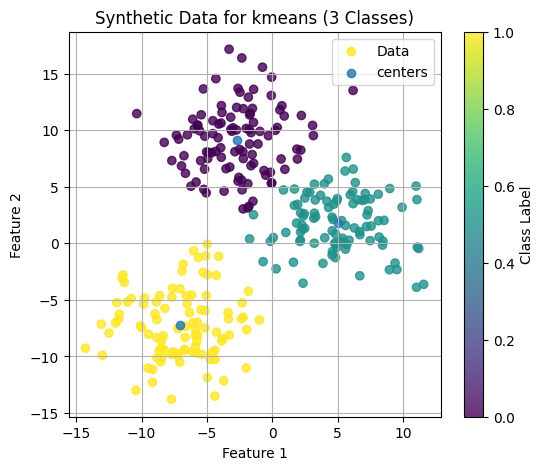

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=idx, label='Data', alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], label='centers', alpha=0.8)
plt.title('Synthetic Data for kmeans (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class Label')
plt.legend()
plt.grid(True)
plt.show()

## Density Estimation

- Suppose there’s a latent(hidden/unobserved) random variable z

- $z^{(i)} \sim \text{multinomial}(\phi)$,   $z \in \{1, \dots, k\}$ (multinomial probability of which Gaussian $x^{(i)}$ came from)


- $p(x^{(i)},z^{(i)})$ are distributed $p(x^{(i)}|z^{(i)})P(z^{(i)})$

- $x^{(i)}|z^{(i)}=j \sim N(\mu_j,\Sigma_j)$ → x follows Gaussian for j cluster

- (different from GDA → GDA only has 2 gaussian, and same covariance)

If we knew the $z^{(i)}$, we can use MLE, but we dont know → EM

$$
l(\phi, \mu, \Sigma)
= \sum_{i=1}^m\log p(x^{(i)},z^{(i)};\phi,\mu,\Sigma) \\ \phi_j = \frac1m\sum_{i=1}^m1[z^{(i)}=j]
\\\mu_j = \frac{\sum_{i=1}^m 1[z^{(i)}=j]x^{(i)}}{\sum_{i=1}^m1[z^{(i)}=j]}
$$

## EM Algorithm

EM is softer way than k-means
- softer: its $z^{(i)} uses probability while k-means strictly choose one mu

- E-step: Choosing some $\theta$ construct lower-bound curve of $l(\theta)$

    - The curve is smaller with any $\theta$ than actual $l(\theta)$

    - The curve meets actual $l(\theta)$ with chosen $\theta$

- M-step: find theta that Maximizes the curve

repeat until convergence



## Derivation



- goal: $\text{argmax}_\theta l(\theta)$



- $l(\theta) = \sum_{i=1}^m\log P(x^{(i)};\theta) $ : log-likelyhood

- $\sum_{i=1}^m\log P(x^{(i)};\theta) = \sum_{i=1}^m\log \sum_{z^{(i)}} P(x^{(i)},z^{(i)};\theta)$ : marginalize over $z^{(i)}$

$$
l(\theta) = \sum_{i=1}^m\log p(x^{(i)};\theta) = \sum_{i=1}^m\log \sum_{z^{(i)}} p(x^{(i)},z^{(i)};\theta)
$$

- $Q_i(z^{(i)}) $ is probability distribution i.e. $\sum_{z^{(i)}}Q_i(z^{(i)}) = 1$

$$
 \sum_i \log \sum_{z^{(i)}}Q_i(z^{(i)})\frac{p(x^{(i)},z^{(i)};\theta)}{Q_i(z^{(i)})} = \sum_i \log E_{z^{(i)} \sim Q_i}[\frac{p(x^{(i)},z^{(i)};\theta)}{Q_i(z^{(i)})}]
$$

- Jensen's Inequality: if $f$ is convex ($f''(x) > 0$)  $f(E[x]) \le E[f(x)] $

$$
\sum_i \log E_{z^{(i)} \sim Q_i}[\frac{p(x^{(i)},z^{(i)};\theta)}{Q_i(z^{(i)})}]  \ge \sum_i E_{z^{(i)} \sim Q_i}[\log \frac{p(x^{(i)},z^{(i)};\theta)}{Q_i(z^{(i)})}]
$$

- It's the lower bound curve of $l(\theta)$, but have to guarantee that it's equal to $l(\theta)$ w.r.t chosen $\theta$ \
→ (Jensen's Inequality +) It's equal when x is constant.
$$
\frac{p(x^{(i)},z^{(i)};\theta)}{Q_i(z^{(i)})} = \text{constant} \quad
\therefore p(x^{(i)},z^{(i)};\theta) \propto Q_i(z^{(i)}), \quad  \sum_{z^{(i)}}Q_i(z^{(i)}) = 1 \\
\therefore Q_i(z^{(i)}) = \frac{p(x^{(i)},z^{(i)};\theta)}{\sum_{z^{(i)}}p(x^{(i)},z^{(i)};\theta)}
$$

Conclusion

**E-step:**  $Q_i(z^{(i)}) := p(z^{(i)}|x^{(i)};\theta)$

**M-step**: $\theta := \text{argmax}_\theta\sum_i  \sum_{z^{(i)}}Q_i(z^{(i)})\log\frac{p(x^{(i)},z^{(i)};\theta)}{Q_i(z^{(i)})}$


### Gaussian Mixture Model (GMM)

E-step (Guess value of z(i)’s)
- Find $w^{(i)}_j$ ( is how much $x^{(i)}$ is assigned to the $\mu_j$ gaussian, $p(z^{(i)}|x^{(i)};\theta)$ )
$$
w^{(i)}_j = p(z^{(i)}=j|x^{(i)};\phi,\mu,\Sigma)\\= \frac{p(x^{(i)}|z^{(i)}=j)p(z^{(i)}=j)}{\sum_{l=1}^k p(x^{(i)}|z^{(i)}=l)p(z^{(i)}=l)}
$$

- upper-left term = Gaussian, upper-right term = $\phi_j$

M-step
$$
\phi_j := \frac1m\sum_{i=1}^mw_j^{(i)}
\\\mu_j := \frac{\sum_{i=1}^m w_j^{(i)}x^{(i)}}{\sum_{i=1}^mw_j^{(i)}}
\\\Sigma_j := \frac{\sum_{i=1}^mw_j^{(i)}(x^{(i)}-\mu_j)(x^{(i)}-\mu_j)^T}{\sum_{i=1}^mw_j^{(i)}}
$$




In [ ]:
from scipy.stats import multivariate_normal
np.random.seed(0)

def one_hot_encode(Y, num_classes):
    N = Y.shape[0]
    one_hot_Y = np.zeros((N, num_classes))
    # Ensure Y is flattened to 1D for advanced indexing
    one_hot_Y[np.arange(N), Y.flatten()] = 1
    return one_hot_Y

def gmm(X, n_labels, epoch = 100):
    n_features = X.shape[1]
    n_examples = X.shape[0]

    #initialization
    p_phi = np.random.rand(n_labels)
    p_phi = p_phi / np.sum(p_phi)

    random_index = np.random.choice(X.shape[0], n_labels, replace = False)
    p_mu = X[random_index].copy()

    p_sigma = np.array([np.eye(n_features) for _ in range(n_labels)])

    for i in range(epoch):
        # E-step
        norm_mv = [multivariate_normal(p_mu[j], p_sigma[j]) for j in range(n_labels)]
        x_pdf = [norm_mv[j].pdf(X) for j in range(3)]
        x_pdf_np = np.array(x_pdf).T
        x_pdf_phi = x_pdf_np * p_phi
        x_phi_sum = np.sum(x_pdf_phi, axis=1)
        W = x_pdf_phi / x_phi_sum.reshape(-1,1)

        # M-step
        new_phi = np.sum(W, axis = 0) / n_examples
        new_mu_arr = np.array( [X * np.repeat(W[:, j].reshape(-1,1), n_features, axis = 1) for j in range(n_labels)] )
        new_mu = np.sum(new_mu_arr, axis = 1) / np.sum(W, axis = 0).reshape(-1,1)

        x_mu = np.array([X - new_mu[j] for j in range(n_labels)])
        x_mu_w = np.array(x_mu * (W.T).reshape(n_labels, n_examples, 1))
        x_mu_mu_w = [x_mu_w[j].T @ x_mu[j] for j in range(n_labels)]
        new_sigma = [x_mu_mu_w[j] / np.sum(W, axis = 0)[j] for j in range(n_labels)]
        #print(new_phi)
        #print(new_mu)
        #print(new_sigma)

        p_phi, p_mu, p_sigma = new_phi, new_mu, new_sigma

    return p_phi, p_mu, p_sigma

phi, mu, sigma = gmm(X, 3, 1000)

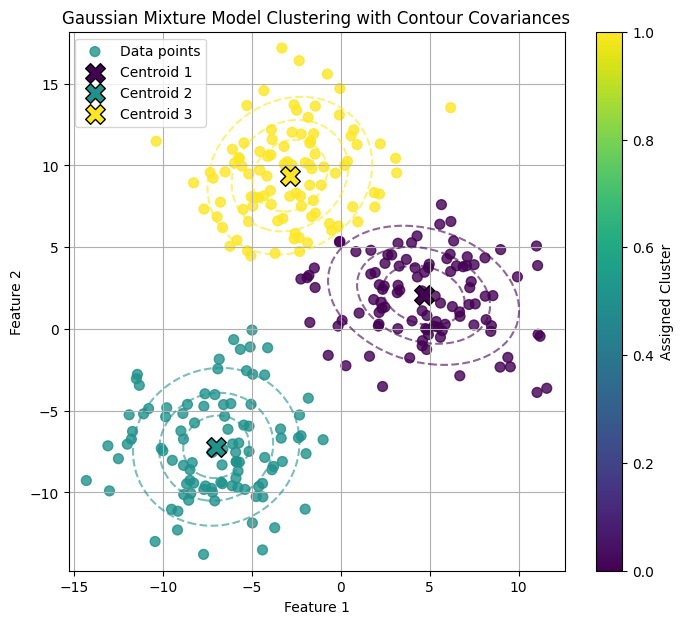

In [ ]:
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

def plot_gmm(X, phi, mu, sigma):
    n_labels = len(phi)

    # Calculate responsibilities (E-step equivalent for plotting)
    norm_mv = [multivariate_normal(mu[j], sigma[j]) for j in range(n_labels)]
    x_pdf = [norm_mv[j].pdf(X) for j in range(n_labels)]
    x_pdf_np = np.array(x_pdf).T
    x_pdf_phi = x_pdf_np * phi
    x_phi_sum = np.sum(x_pdf_phi, axis=1)
    W = x_pdf_phi / x_phi_sum.reshape(-1,1)

    # Get cluster assignments
    cluster_assignments = np.argmax(W, axis=1)

    plt.figure(figsize=(8, 7))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', s=50, alpha=0.8, label='Data points')

    ax = plt.gca()

    colors = plt.cm.viridis(np.linspace(0, 1, n_labels))

    # Create a meshgrid for contour plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    for i in range(n_labels):
        # Plot centroid
        plt.scatter(mu[i, 0], mu[i, 1], marker='X', s=200, c=[colors[i]], edgecolor='black', linewidth=1, label=f'Centroid {i+1}')

        # Plot covariance as contour lines
        Z = norm_mv[i].pdf(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, levels=3, colors=colors[i], alpha=0.6, linestyles='--')

    plt.title('Gaussian Mixture Model Clustering with Contour Covariances')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label='Assigned Cluster')
    plt.show()

plot_gmm(X, phi, mu, sigma)


##Principal Component Analisys (PCA)
Reduce dimension of input features

 - Before starting, Normalize data
 - Original dim: d, target dim: k
 - Projection onto reduced dimension (unit vector $u$ of line, plane, hyperplane ...) → $x^{(i)^T}u$
 - GOAL : Preserve qualities as much as possible → maximize Variance in converted dimension
 - GOAL : $\max_n \frac1n \sum_{i=1}^n (x^{(i)^T}u)^2$
 $$
\max_n \frac1n \sum_{i=1}^n (x^{(i)^T}u)^2 = \max_n \frac1n \sum_{i=1}^n u^Tx^{(i)} x^{(i)^T}u \\
= \max_n u^T \left( \frac1n \sum_{i=1}^n x^{(i)} x^{(i)^T}\right) u \\
= \max_n u^T \Sigma u
 $$
- Lagrange Multiplier (maximize  $u^T \Sigma u$ s.t. $u^Tu=1$)
$$
\nabla _u u^T \Sigma u - \lambda \nabla_u u^Tu = 0 \\
\therefore \quad (\Sigma^T \Sigma)u - 2\lambda u = 0 \\
\therefore \quad (\Sigma - \lambda ㅑ) u = 0
$$
- $\lambda$ is eigenvalue, $u$ is eigenvector of Empirical Covariance $\Sigma$

**Conclusion**: unit vectors of new dimension $u_1 \dots u_k $ is  principal(largest) $k$ eigenvectors of Emprirical Covariance $\Sigma$


/tmp/ipython-input-2794437302.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


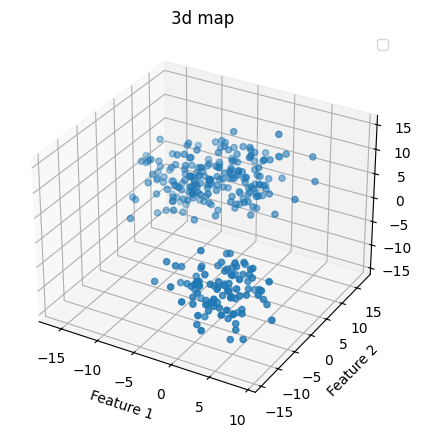

In [ ]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
N_samples = 300
n_features = 3
n_classes = 3
X, Y = make_blobs(n_samples=N_samples, n_features=n_features, centers=n_classes,
                  cluster_std=3.0, random_state=42)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
plt.title('3d map')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

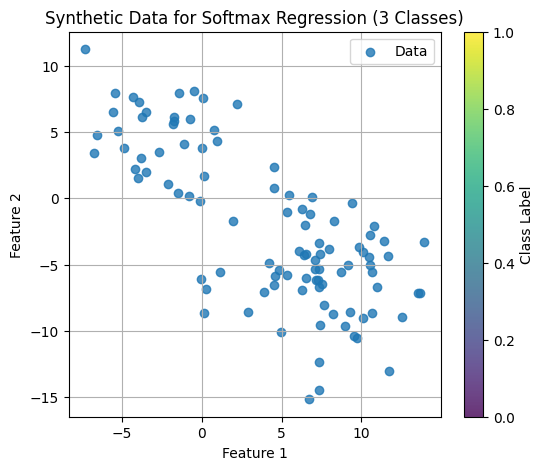

In [ ]:
dimension = 2
#find Emprical Covariance
sigma = X.T @ X
sigma = sigma / X.shape[0]

eigenvalue, eigenvector = np.linalg.eig(sigma)
units = eigenvector[0:dimension]

newX = X @ units.T


plt.figure(figsize=(6, 5))
plt.scatter(newX[:, 0], newX[:, 1], label='Data', alpha=0.8)
plt.title('Synthetic Data for Softmax Regression (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class Label')
plt.legend()
plt.grid(True)
plt.show()

##Independent Component Analisys (ICA)
Find sources of data
- Sources: $s\in ℝ^n$
- Sources j at time i: $s_j^{(i)}$
- entries (we actually get): $x^{(i)} = As^{(i)} \quad (x\in ℝ^n)$
→ x is speaker, s is microphone
- GOAL: Find $W = A^{-1}$ → to find sources

###Derivation
- Suppose s is drawn by $P_s(s)$
 → $\int P_x(x)dx = \int P_s(s)ds \therefore P_x(x) = P_s(s)\left| \frac{ds}{dx} \right| = P_s(Wx)|W| $

- Suppose sources are independent
 → $P(s) = \prod_{j=1}^d P_s(s_j) = \prod_{j=1}^d P_s(w_j^T x)⋅|W|$

- We choose $F_s(x)$ (CDF Function) of sigmoid function i.e. $P_s(x) = \sigma'(x) = \sigma(x)(1-\sigma(x))$

- Log Likelihood
$$
l(W) = \sum_{i=1}^n \left( \sum_{j=1} ^d \log g'(w_j^Tx) + \log|W|  \right) \\
\nabla_Wl(W) = \begin{bmatrix}
1-2g(w_1^Tx)\\
\vdots\\
1-2g(w_n^Tx)
\end{bmatrix}x^{(i)T}+(W^T)^{-1}
$$
- Not Closed form -> Gradient Ascent
$$
W := W + \alpha \nabla_Wl(W)
$$



Original Sources shape: (2, 200)
Mixed Signals shape: (2, 200)


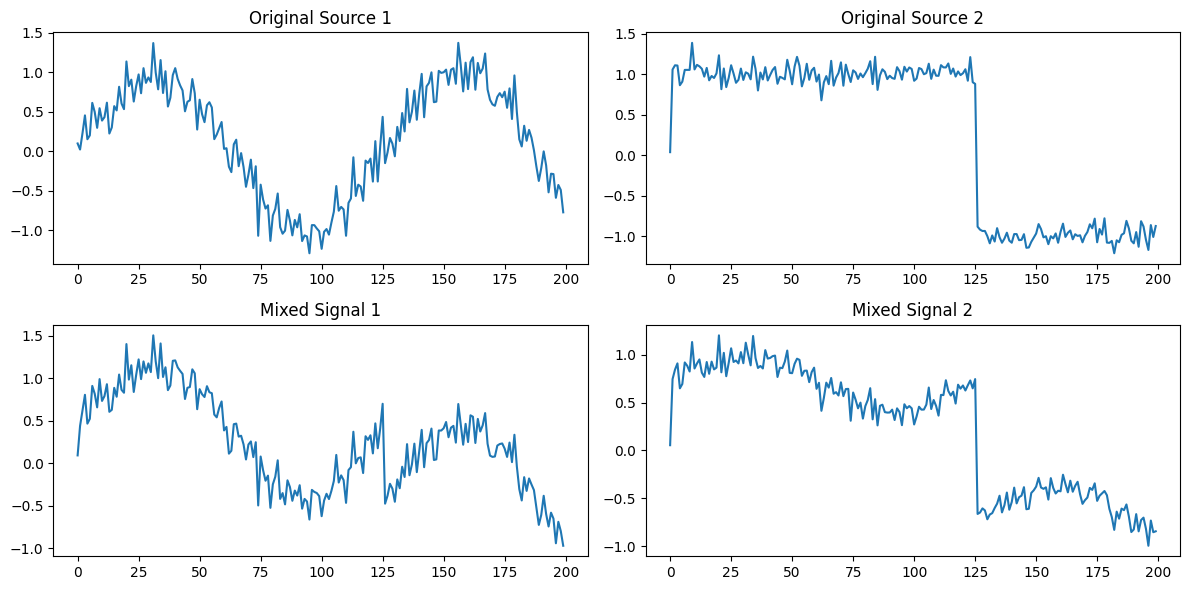

In [ ]:
n_components = 2 # Number of independent sources
n_samples = 200 # Number of time points or observations

# Generate random independent source signals
np.random.seed(42)
s1 = np.sin(np.linspace(0, 10, n_samples)) + np.random.normal(0, 0.2, n_samples) # Sine wave with noise
s2 = np.sign(np.sin(np.linspace(0, 5, n_samples))) + np.random.normal(0, 0.1, n_samples) # Square wave with noise
S = np.vstack((s1, s2))

# Create a random mixing matrix A
A = np.array([[0.8, 0.4], [0.3, 0.7]]) # Example mixing matrix

# Generate mixed signals X
X = np.dot(A, S)

print("Original Sources shape:", S.shape)
print("Mixed Signals shape:", X.shape)

# Plot the original sources and mixed signals
plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.plot(S[0])
plt.title('Original Source 1')

plt.subplot(2, 2, 2)
plt.plot(S[1])
plt.title('Original Source 2')

plt.subplot(2, 2, 3)
plt.plot(X[0])
plt.title('Mixed Signal 1')

plt.subplot(2, 2, 4)
plt.plot(X[1])
plt.title('Mixed Signal 2')

plt.tight_layout()
plt.show()

Calculated W:[[ 0.67171927 -0.25491632]
 [-0.25609599  0.57173553]] 
 Inverse A: [[ 1.59090909 -0.90909091]
 [-0.68181818  1.81818182]] 


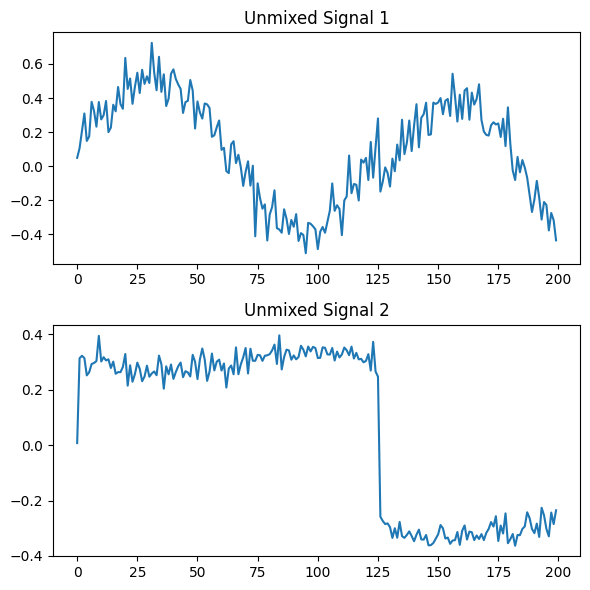

In [ ]:
sigmoid = lambda x: 1 / (1 + np.exp^(-x))
from scipy.special import expit

n_source = X.shape[0]
n_time = X.shape[1]
W = np.eye(n_source)

epoch = 1
alpha = 0.01

for i in range(epoch):
    W_inv = np.linalg.inv(W.T)
    mat = 1 - (2 * expit(W.T @ X))
    mat_2 = mat @ X.T

    W = W + alpha * (mat_2 + W_inv)

ica_source = W @ X

print(f"Calculated W:{W} \n Inverse A: {np.linalg.inv(A)} ")

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(ica_source[0])
plt.title('Unmixed Signal 1')

plt.subplot(2, 1, 2)
plt.plot(ica_source[1])
plt.title('Unmixed Signal 2')

plt.tight_layout()
plt.show()